In [1]:
import sympy as sm
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import timeit

In [21]:
def RCP (t, u, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1): 
    
    du = np.zeros([4, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]

    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
    du[3] = 1
    
    du = du.reshape(4,)
    return(du)

In [4]:
pars = pd.read_csv('param_hycub_H2.csv')
par1 = np.array(pars)
np.shape(par1)

(10, 1000)

In [26]:
i=3
r0 = par1[0][i]; q0 =  par1[1][i]
aC0 = par1[2][i]; eC0 = par1[3][i]; mC0 = par1[4][i]; hC0 = par1[5][i]
aP0 = par1[6][i]; eP0 = par1[7][i]; mP0 = par1[8][i]; hP0 = par1[9][i]

u0 = np.array([5000, 280, 58, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
print(p)

(3.643600021, 3.15e-05, 0.386839673, 0.184338712, 0.041651292, 0.340858499, 0.020505594, 0.269601636, 0.573379826, 0.047695049)


In [27]:
tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*10)

sol1 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(np.shape(sol1.y))
print(np.shape(sol1.t))

(4, 100000)
(100000,)


In [28]:
u0 = np.array([12211, 421, 199, 0])
tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*10)

sol3 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(np.shape(sol3.y))
print(np.shape(sol3.t))

(4, 100000)
(100000,)


In [29]:
u0 = np.array([7600, 530, 110, 0])
tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*10)

sol2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(np.shape(sol2.y))
print(np.shape(sol2.t))

(4, 100000)
(100000,)


In [30]:
ssv0 = sol1.y[:,5000:]
np.shape(ssv0)
tm = ssv0[3]; R0 = ssv0[0]; C0 = ssv0[1]; P0 = ssv0[2]

In [31]:
ssv1 = sol2.y[:,5000:]
np.shape(ssv1)
tm = ssv1[3]; R1 = ssv1[0]; C1 = ssv1[1]; P1 = ssv1[2]

In [32]:
ssv2 = sol3.y[:,5000:]
np.shape(ssv2)
tm = ssv2[3]; R2 = ssv2[0]; C2 = ssv2[1]; P2 = ssv2[2]

<IPython.core.display.Javascript object>


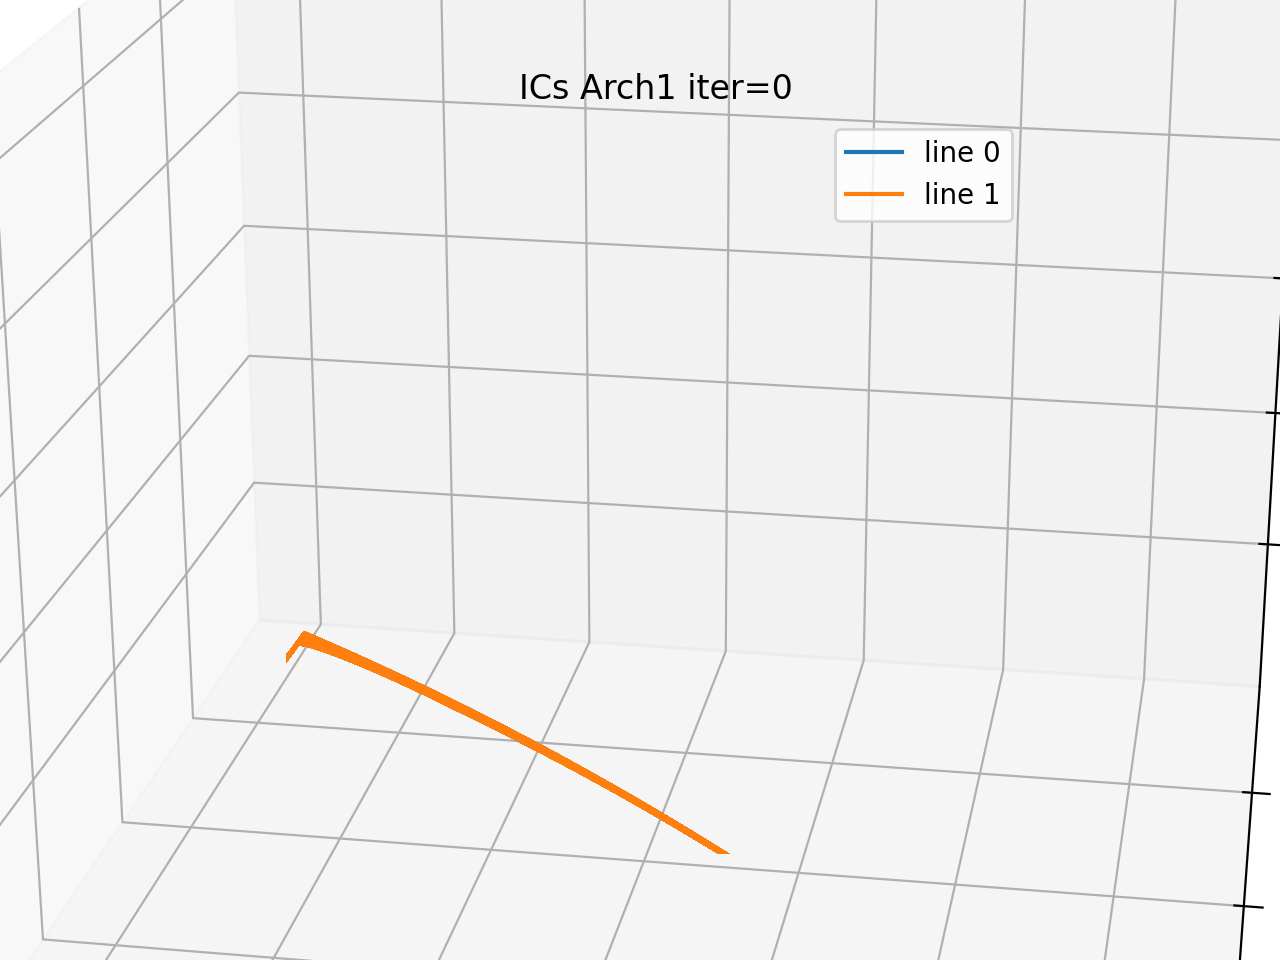

interactive(children=(IntSlider(value=10, description='dist', max=20, min=1), Output()), _dom_classes=('widget…

In [12]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R0, C0, P0,  label = "line 0")
ax.plot(R1, C1, P1,  label = "line 1")
ax.set_title("ICs Arch1 iter=0")
ax.legend()
ax.set_xlabel("R"); ax.set_ylabel("C"); ax.set_zlabel("P")

from ipywidgets import interact

@interact(dist=(1, 20, 1))
def update(dist=10):
    ax.dist = dist
    display(fig)

<IPython.core.display.Javascript object>


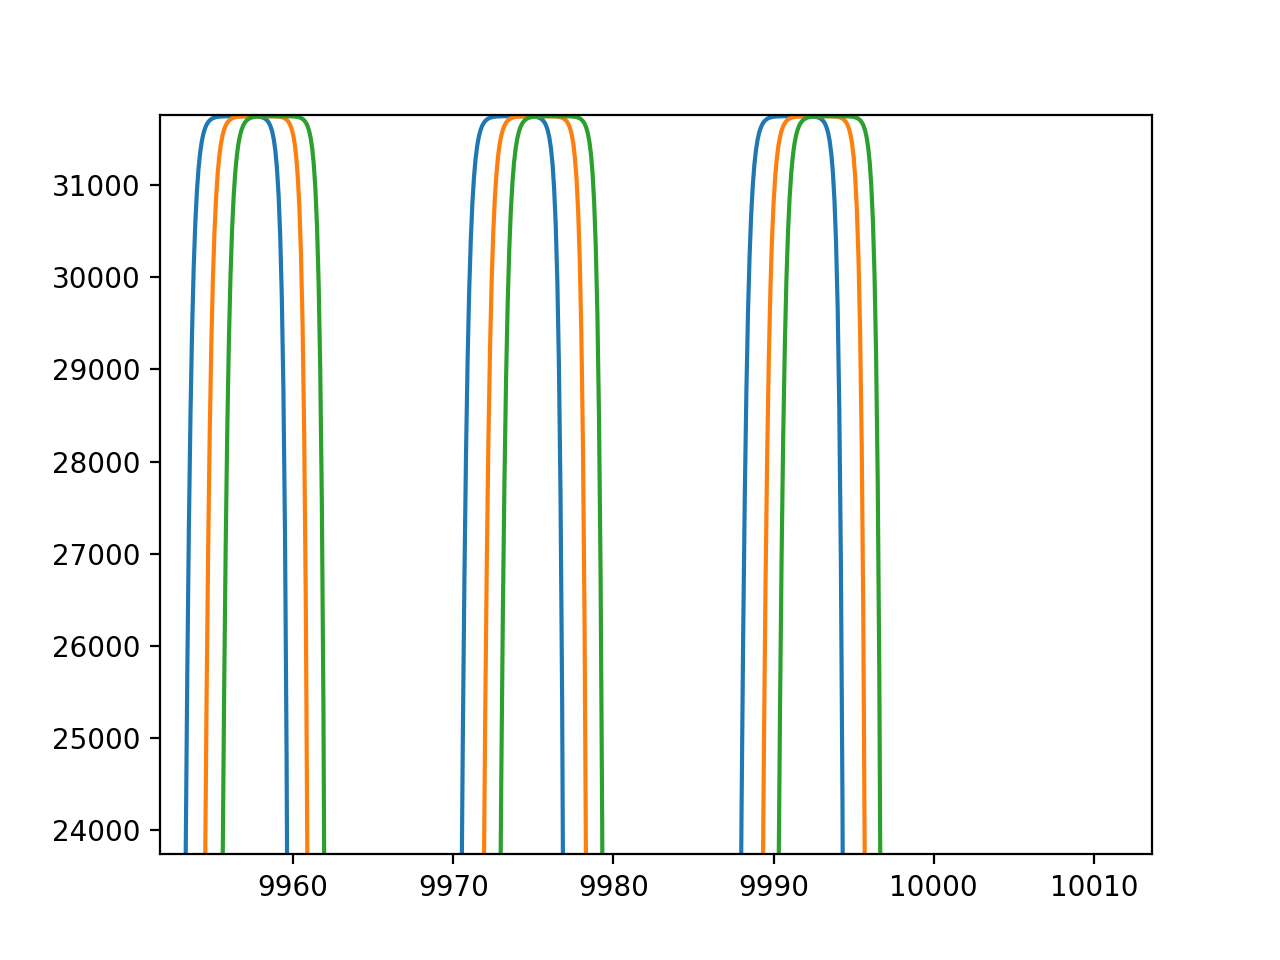

In [34]:
%matplotlib notebook
plt.plot(tm, R0, label = 'IC0')
plt.plot(tm, R1, label = 'IC1')
plt.plot(tm, R2, label = 'IC2')
plt.show()

<IPython.core.display.Javascript object>


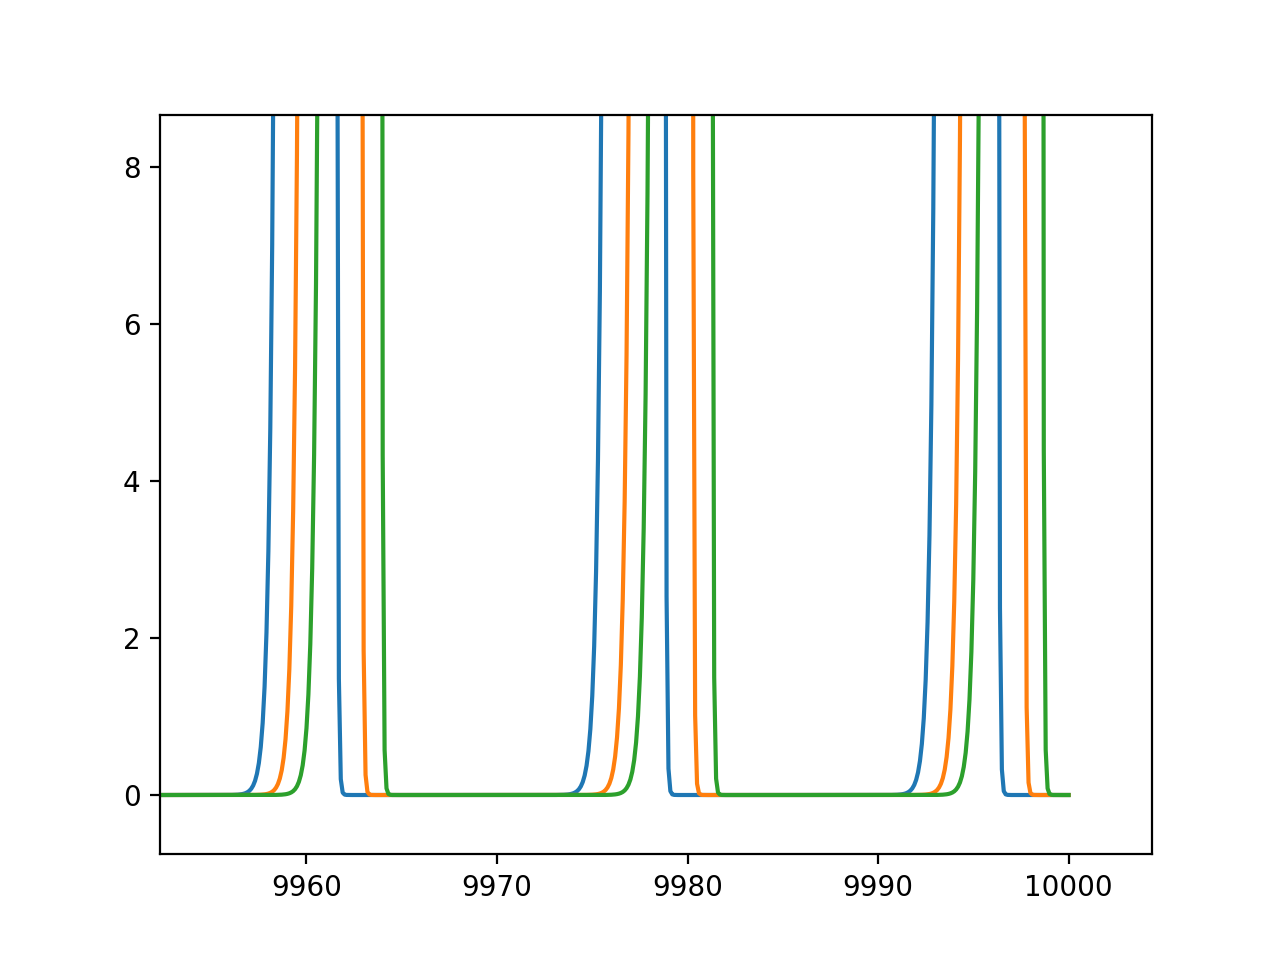

In [35]:
%matplotlib notebook
plt.plot(tm, C0, label = 'IC0')
plt.plot(tm, C1, label = 'IC1')
plt.plot(tm, C2, label = 'IC2')
plt.show()


<IPython.core.display.Javascript object>


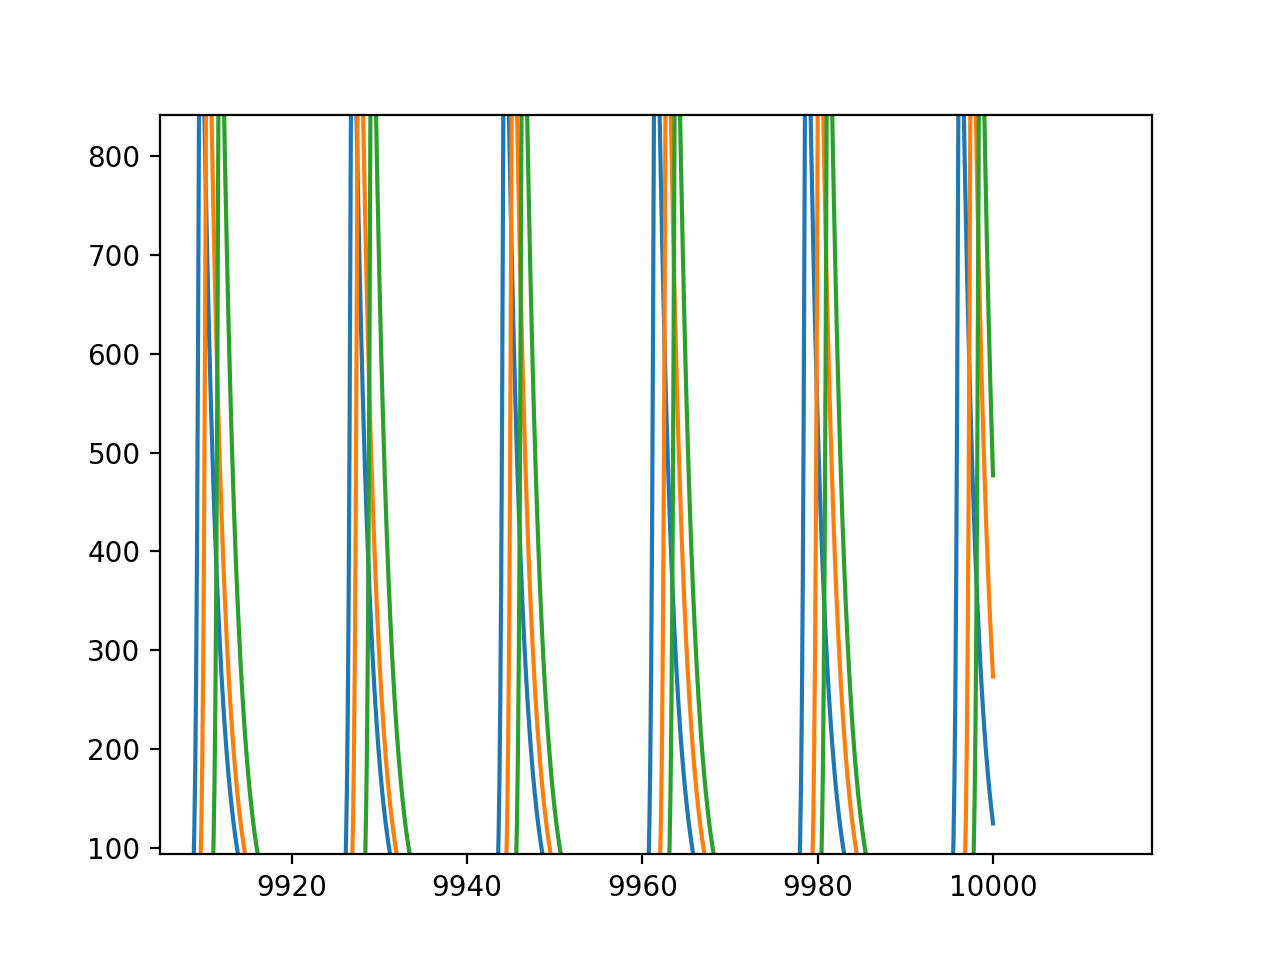

In [36]:
%matplotlib notebook
plt.plot(tm, P0, label = 'IC0')
plt.plot(tm, P1, label = 'IC1')
plt.plot(tm, P2, label = 'IC2')
plt.show()

In [37]:
def RCP (t, u, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1): 
    
    du = np.zeros([3, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]

    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
   
    
    du = du.reshape(3,)
    return(du)

In [38]:
import lhsmdu as lh
prs = lh.createRandomStandardUniformMatrix(10,3)
pr1 = prs
pr1[:,0] = pr1[:,0] * 10000 + 2000
pr1[:,1] = pr1[:,1] * 5000 + 500
pr1[:,2] = pr1[:,2] * 1000 + 10

<IPython.core.display.Javascript object>


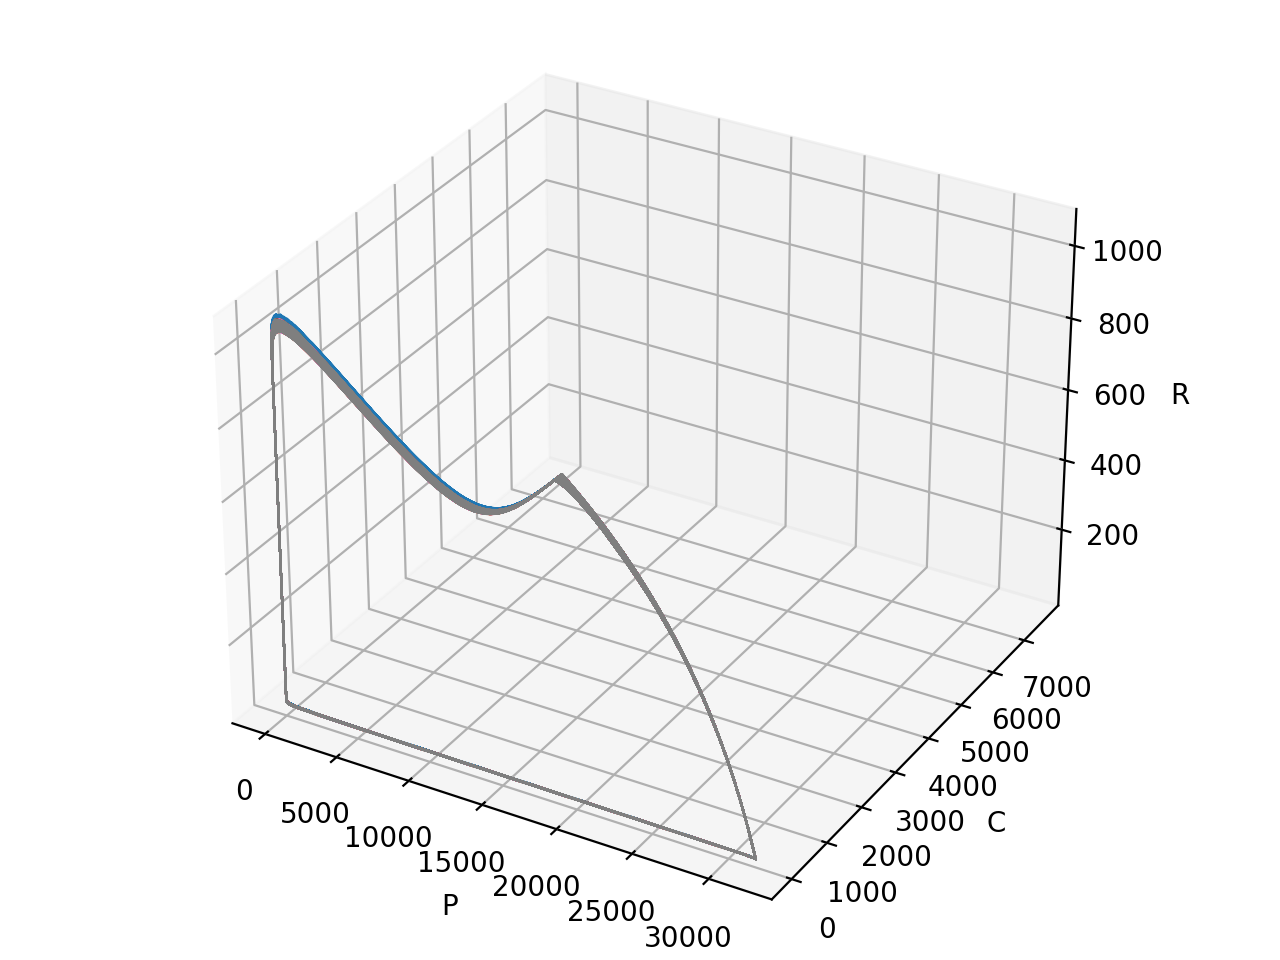

C:\Users\karth\AppData\Local\Temp\ipykernel_12792\1469614.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


[0, 'simu over']
[1, 'simu over']
[2, 'simu over']
[3, 'simu over']
[4, 'simu over']
[5, 'simu over']
[6, 'simu over']
[7, 'simu over']


In [19]:
# Interactive Mode
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib notebook
# Create subplots
cols = ['#1f77b4', '#ff7f0e',  '#2ca02c',  '#d62728',  '#9467bd',  '#8c564b',  '#e377c2',  '#7f7f7f',  '#bcbd22',  '#17becf']

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('P')
ax.set_ylabel('C')
ax.set_zlabel('R')
ax.plot3D(R1, C1, P1, linewidth=0.85)

# Import Library

for i in np.arange(10):
    
    u0 = pr1[i,:]
    tend = 10000
    t_span = (0, tend)
    tint = np.linspace(0, tend, tend*10)

    sol1 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print([i, 'simu over'])
    
    ssv0 = sol1.y[:,5000:]
    np.shape(ssv0)
    R0 = ssv0[0]; C0 = ssv0[1]; P0 = ssv0[2]
    
    ax.plot3D(R0, C0, P0, c=cols[i], linewidth=0.85)
    

plt.show()